<h1 style="text-align: center;"> Striver Strings - Hard Problems </h1>

# 1. Minimum Number of Bracket Reversals needed to Make an Expression Balanced:

## Problem Statement :

Given a string s consisting of only opening and closing brackets '(' and ')', find out the minimum number of reversals required to convert the string into a balanced expression.

If it is not possible to make the brackets balanced, return -1. A reversal means changing '(' to ')' or vice-versa.

### Examples :

**Example 1:**
```
Input: s = ")(())((("
Output: 3

Explanation: One way to balance is: "((())())". There is no balanced sequence that can be formed in lesser reversals.
```

**Example 2:**
```
Input: s = "(()((()(())(("
Output: -1

Explanation: There's no way we can balance this sequence of braces.
```

```
Constraints:
1 <= s.length <= 10^4
```

### Intuition

To find the minimum number of bracket reversals to make an expression balanced, firstly the number of balanced brackets must be found. Ignoring the balanced brackets, it will become easier to understand the required count.

### Understanding

Consider an example string: ")(())((("

Ignoring the already balanced brackets, the leftover part of the string will be: ")((("

Note: Once the balanced brackets are ignored, the string will always be left with some number of closing brackets followed by some number of opening brackets.

Say the number of open brackets are represented as 'open' and number of closed brackets are represented as 'close', it can be seen that the minimum number of bracket reversals to make an expression balanced will depend upon:

```
* The number of pairs that can be formed of open brackets or closed brackets. For every 2n open brackets, we only need to reverse n open brackets to form valid pairs.
* Similarly for every 2n closed brackets, we only need to reverse n closed brackets to form valid pairs.
* If there are any odd number of open or closed brackets, then those will have to be reversed separately to form valid paranthesis.

Hence, the required minimum number of brackets will be:
      (open / 2) + (open % 2) + (close / 2) + (close % 2)
where 'open' and 'close' represent the number of invalid open and close brackets respectively.
```

### Approach

* If the length of the string is odd, it's impossible to balance the parentheses, so return -1.
* Initialize counters to track unbalanced opening and closing brackets.

Traverse the string:

* Increase the count for opening brackets.
* If a closing bracket is encountered, reduce the opening count if an opening bracket is available to form a balanced pair. Otherwise, increase the closing count for unmatched closing brackets.
* After traversing the string, calculate the minimum number of reversals needed: Half of the remaining unbalanced opening and closing brackets need to be reversed.
* Return the total count of reversals required to balance the string.

## Optimal Python Solution

In [2]:
class Solution:
    # Function to find the minimum number of reversals required
    # to convert the string into a balanced expression. 
    def countRev(self, s: str) -> int:
        n = len(s) # Size of string
        
        # If string is of odd length, it is not 
        # possible to balance the paranthesis 
        if n % 2 != 0:
            return -1
        
        # To store the count of opening and closing brackets
        open = 0
        close = 0
        
        for i in range(n):
            # Increment open count if opening bracket is found
            if s[i] == '(':
                open += 1
            
            # Else (closing bracket is found)
            else:
                # If a opening bracket is there, a pair
                # of balanced paranthesis is formed 
                if open > 0:
                    open -= 1
                
                # Otherwise the closing bracket remain unbalanced
                else:
                    close += 1
        
        # Computing the result
        ans = (open // 2) + (open % 2) + (close // 2) + (close % 2)
        
        return ans # Return the result

In [3]:
if __name__ == "__main__":
    s =  ")(())((("
    
    # Creating an instance of Solution class
    sol = Solution() 
    
    # Function call to find the minimum number of reversals 
    # required to convert the string into a balanced expression. 
    ans = sol.countRev(s)
    
    # Output
    print("The minimum number of reversals required are:", ans)

The minimum number of reversals required are: 3


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n) (where n is the length of the input string). 
The input string is traversed once taking O(n) time.
```

**Space Complexity:**
```
The Space Complexity will be O(1),  since only a couple of variables are used that are taking constant space..
```

# 2. Count and Say :

## Problem Statement :

The count-and-say sequence is a sequence of digit strings defined by the following recursive formula:

countAndSay(1) = "1"
For n > 1, countAndSay(n) is generated by describing countAndSay(n-1) in terms of the frequency and value of consecutive identical digits.

```
"1" is read as "one 1" or "11".
"11" is read as "two 1s" or "21".
"21" is read as "one 2, then one 1" or "1211".
"1211" is read as "one 1, one 2, then two 1s" or "111221".
"111221" is read as "three 1s, two 2s, then one 1" or "312211".
```

For example:



Given a positive integer n, return the nth term of the count-and-say sequence.

### Examples :

**Example 1:**
```
Input: n = 4
Output: "1211"

Explanation:

countAndSay(1) = "1"
countAndSay(2) is described as "one 1" = "11"
countAndSay(3) is described as "two 1s" = "21"
countAndSay(4) is described as "one 2, then one 1" = "1211"
```

**Example 2:**
```
Input: n = 1
Output: "1"

Explanation:

This is the base case where countAndSay(1) is "1".
```

### Intuition

A simple way to solve the problem is to take the help of recursion which will come in handy while determining the (n-1)th term of the count-and-say sequence.

The nth string of the count-and-say sequence can be determined by counting the identical consecutive digits.

### Approach

To solve this problem, a recursive approach will be followed:

* The base case is defined: the first term of the sequence is "1".
* For subsequent terms, the sequence is generated by recursively calling the function with the previous term.
* The function processes the previous term by counting consecutive identical digits.
* For each group of identical digits, the count and the digit itself are added to the result string.
* Once all groups of consecutive digits are processed, the final result is returned as the next term in the sequence.

## Optimal Python Solution

In [1]:
class Solution:
    # Recursive function to return the nth 
    # term of the count-and-say sequence
    def countAndSay(self, n: int) -> str:
        if n == 1:
            return "1"
        
        # Recursive call
        prev = self.countAndSay(n - 1)
        length = len(prev)
        
        # To store the answer
        ans = ""
        
        # To count the frequency of identicals
        count = 1  
        
        # Traverse the string 
        for i in range(1, length):
            # If identicals are found, increment the counter
            if prev[i] == prev[i - 1]:
                count += 1
            # Otherwise
            else:
                ans += str(count) # Add frequency
                ans += prev[i - 1] # Add the digit 
                count = 1 # Reset counter to 1
        
        # Adding the frequency for the last digit and the last digit
        ans += str(count)
        ans += prev[-1]
        
        return ans  # Return the result

In [2]:
# Main function
if __name__ == "__main__":
    n = 4
    
    # Creating an instance of Solution class
    sol = Solution()
    
    # Recursive function call to return the nth term of the count-and-say sequence
    ans = sol.countAndSay(n)
    
    # Output
    print(f"The nth term of the count-and-say sequence is: {ans}")

The nth term of the count-and-say sequence is: 1211


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity cannot be exactly determined. This is because the Time Complexity will depend on the length of the string in each step which is uncertain.
```

**Space Complexity:**
```
The Space Complexity cannot be exactly determined. The recursive stack space will take O(n) space and during each step, the string generated will take a variable space.
```

# 3. Hashing in Strings - Theory :

## Introduction :

In this article, we will be discussing the Hashing in Strings. Hashing refers to the process of converting a string into a numeric value, called a hash value, using a mathematical formula. It helps in comparing strings, searching efficiently, and solving complex problems like pattern matching.

## Need of Hashing :

Hashing is essential as it helps in following operations:

1. <b> Efficient Comparisons: </b> Comparing large strings is slow. Hash values allow comparison in constant time.
2. <b> Faster Lookups: </b> Hash tables like dictionaries or unordered maps use hash values to store and retrieve strings quickly.
3. <b> Detect Duplicates or Anagrams: </b> Hashing helps in checking duplicates or determining anagram groups efficiently.
4. <b> Pattern Matching: </b> Algorithms like Rabin-Karp use string hashing to find substrings in linear time.

## How does String Hashing work? :

String hashing treats each character as a number and combines them using a mathematical formula. A common formula is <b> Polynomial Rolling Hash </b>. Using this hash value is calculated as follows:

```
Hash(s) = (s[0] * p^0 + s[1] * p^1 + s[2] * p^2 + ... + s[n-1] * p^(n-1)) % m

where, s[i] is the character's ASCII or mapped value (like 'a' = 1),
p is a prime base (commonly 31 or 53) and
m is a large prime modulus to avoid overflow and reduce collisions.
```

## Handling Collisions :

Two different strings can have the same hash, called a collision. To reduce this, we use a large m (like 1e9+7). We can also use double hashing (combine two different hash functions) or use a good base (p) that spreads values well.

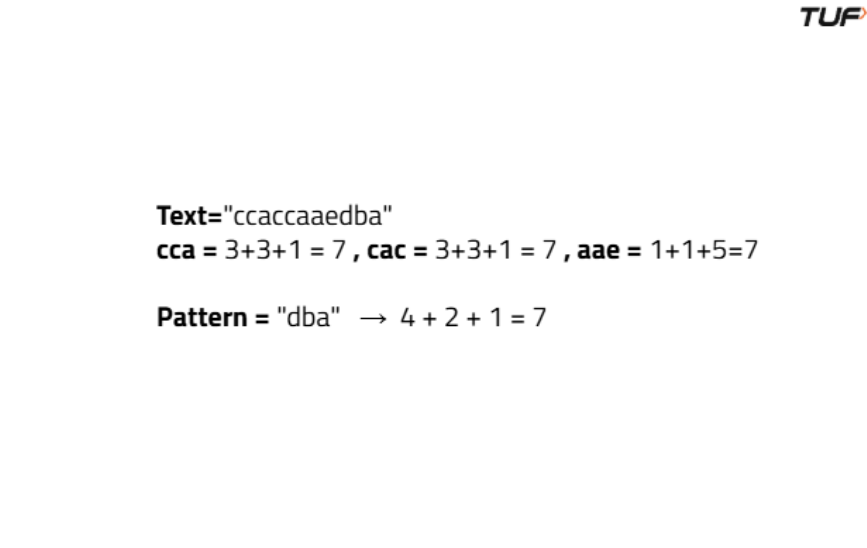

**Example:**
```
Calculate Hash value of string s = "abc".

Solution:

Let us assume p to be 31 and m to be 1e9+9.

Now, we can map characters as following: 'a' = 1, 'b' = 2 and 'c' = 3.
Thus, Hash(s) = (1 * 31^0 + 2 * 31^1 + 3 * 31^2) % 1e9+9
Hash(s) = 2946.
Therefore, "abc" gets hashed to value 2946.
```

# 4. Rabin Karp Algorithm :

## Problem Statement :

Given a string text and a string pattern, implement the Rabin-Karp algorithm to find the starting index of all occurrences of pattern in text. If pattern is not found, return an empty list.

### Examples :

**Example 1:**
```
Input: text = "ababcabcababc", pattern = "abc"
Output: [2, 5, 10]

Expalanation : The pattern "abc" is found at indices 2, 5, and 10 in the text.
```

**Example 2:**
```
Input: text = "hello", pattern = "ll"
Output: [2]

Explanation: The pattern "ll" is found at index 2 in the text.
```

```
Constraints:
1<= text.length, pattern.length <=5*10^4
```

## Brute Force Solution

### Intuition

The brute force appraoch to solve this problem is to use two nested loops to match each character of pat in txt.

### Approach

* Initialize an empty list to store the starting indices where the pattern is found in the text.
* Traverse the text by iterating through each possible starting position where the pattern could fit.
* For each starting position, check if the pattern matches the substring of the text starting from that position.
* Compare each character in the pattern with the corresponding character in the text. If any character does not match, move to the next starting position.
* If all characters match, add the current starting index to the result list.
* Return the result list containing all starting indices where the pattern is found in the text.

## Brute Force Python Solution

In [3]:
class Solution:
    # Function to find the starting index of all occurrences of pattern in text
    def search(self, pat, txt):
        n = len(pat)
        m = len(txt)
        
        # List to store the result
        ans = []
        
        # Traverse the text string
        for i in range(m - n + 1):
            flag = True
            
            # Check for every character in pattern
            for j in range(n):
                
                # If characters does not match
                if txt[i + j] != pat[j]:
                    flag = False  # Set the flag as false
                    break
            
            # if the pattern is found, store the index
            if flag:
                ans.append(i)
        
        return ans  # Return the stored result

In [4]:
# Main code
if __name__ == "__main__":
    txt = "ababcabcababc"
    pat = "abc"
    
    # Creating an instance of Solution class
    sol = Solution()
    
    # Function call to find the starting index 
    # of all occurrences of pattern in text
    ans = sol.search(pat, txt)
    
    # Output
    print("The starting indices of all occurrences of", pat, "in", txt, "are:", *ans)

The starting indices of all occurrences of abc in ababcabcababc are: 2 5 10


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(M*N), where M and N are the lengths of text and pattern respectively. The outer loop iterates (M-N+1) times. For each position, the inner loop (the character-by-character comparison between the pattern and text) takes O(N) time in the worst case. Hence, overall it takes O(M*N) time.
```

**Space Complexity:**
```
The Space Complexity will be O(K), because the code uses a constant space and the output list requires O(K) space where K is the number of times the pattern appears in the text.
```

## Optimal Solution

### Intuition

An optimal way to solve the problem is to use the Rabin-Karp algorithm.

### Rabin-Karp Algorithm

The Rabin-Karp algorithm is a string searching algorithm that uses hashing to find any one of a set of pattern strings in a text. The algorithm is based on the fact that if two strings are equal, their hash values are also equal.
<b> The algorithm uses a rolling hash function to calculate the hash value of the pattern and the text. </b> The hash value of the pattern is calculated only once and then the hash value of the text is calculated for each position of the pattern in the text.

The hash value of the substring of text is calculated by subtracting the hash value of the first character of the previous position and adding the hash value of the next character. The algorithm uses a prime number as multiple to calculate the hash value of the pattern and the text to avoid the number of hash collisions ensuring better performance.

### Hash Function

```
The hash value for a string S (having length N) is calculated as follows:
hash(S) = (S[0]×p0 + S[1]×p1 + S[2]×p2 + S[3]×p3 + ... + S[N-1]×pN-1) mod M
where p is a prime number used as multiple and M is a prime number used as a modulus so that the hash value stays in bound.
```

### Rolling Hash

The inital value of the substring hash is calculated as given above. The hash value of the next substring is calculated by subtracting the hash value of the first character of the previous substring and adding the hash value of the next character.
This eliminates the need of calculating the hash value of the substring from scratch. Knowing the hash value of the previous substring, the hash value of the next substring can be calculated in O(1) time making Rabin-Karp algorithm efficient.


## Algorithm:


**Initial Hash Computation:**
```
Computes the hash values of the pattern and the first substring of the text using modular arithmetic to avoid overflow.
Uses a prime multiplier for computing weighted character contributions.
```

**Sliding Window for Hash Matching:**
```
Iterates over the text, updating the hash value for each new substring efficiently using the rolling hash technique.
If the hash of the current substring matches the pattern's hash, a direct character-by-character comparison is performed to confirm the match.
```

**Efficient Hash Update:**
```
Removes the contribution of the leftmost character and adds the new character efficiently to maintain the rolling hash property.
Updates the power values of the prime multiplier accordingly.
```

**Storing the Result:**
```
If a match is confirmed, stores the starting index of the pattern in the text.
Returns the list of indices where the pattern occurs.
```

## Optimal Python Solution

In [5]:
class Solution:
    # Function to find the starting index of all occurrences of pattern in text
    def search(self, pat, txt):
        n = len(pat)
        m = len(txt)
        
        # Primes for Rabin-Karp algorithm
        p = 7
        mod = 101
        
        # To store the hash values of pattern and substring of text
        hashPat = 0
        hashText = 0
        
        pRight = 1
        pLeft = 1
        
        # Computing the initial hash values
        for i in range(n):
            hashPat = (hashPat + ((ord(pat[i]) - ord('a') + 1) * pRight) % mod) % mod
            hashText = (hashText + ((ord(txt[i]) - ord('a') + 1) * pRight) % mod) % mod
            pRight = (pRight * p) % mod
        
        # List to store the result
        ans = []
        
        # Traverse the text string
        for i in range(m - n + 1):
            
            # If the hash value matches
            if hashPat == hashText:
                # Add the index of the result if the substring matches
                if txt[i:i + n] == pat:
                    ans.append(i)
            
            # Updating the hash values
            if i < m - n:
                hashText = (hashText - ((ord(txt[i]) - ord('a') + 1) * pLeft) % mod + mod) % mod
                hashText = (hashText + ((ord(txt[i + n]) - ord('a') + 1) * pRight) % mod) % mod
                hashPat = (hashPat * p) % mod
                
                # Updating the prime multiples
                pLeft = (pLeft * p) % mod
                pRight = (pRight * p) % mod
        
        return ans  # Return the stored result

In [6]:
# Main code
if __name__ == "__main__":
    txt = "ababcabcababc"
    pat = "abc"
    
    # Creating an instance of Solution class
    sol = Solution()
    
    # Function call to find the starting index 
    # of all occurrences of pattern in text
    ans = sol.search(pat, txt)
    
    # Output
    print("The starting indices of all occurrences of", pat, "in", txt, "are:", *ans)

The starting indices of all occurrences of abc in ababcabcababc are: 2 5 10


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(M), where M is the length of the text string. The pattern and first substring's hash values are computed in O(N). The algorithm slides the window across the taking text O(M-N+1) time. In the best/average case, hash collisions are rare, meaning most iterations involve only constant-time hash updates. Thus, the overall time complexity comes out to be O(M).
```

**Space Complexity:**
```
The Space Complexity will be O(K), because the code uses a constant space and the output list requires O(K) space where K is the number of times the pattern appears in the text.
```

# 6. Z-Function :

## Problem Statement :

Given two strings, one is a text string, <b>text</b>, and the other is a pattern string, <b>pattern</b>. Print the indexes of all occurrences of the pattern string in the text string using the Z function algorithm. Use 0-based indexing while returning the indices.

### Examples :

**Example 1:**
```
Input: text = "xyzabxyzabxyz", pattern = "xyz"
Output: 0 5 10

Expalanation : The pattern "xyz" occurs three times in text, starting at indices 0, 5, and 10.
```

**Example 2:**
```
Input: text = "cabcdab", pattern = "abc"
Output: 1

Expalanation : The pattern "abc" occurs one time in text, starting at index 1.
```

```
Constraints:
1<= text.length, pattern.length <=5*10^4
```

## Brute Force Solution

Before going to the Intution, let's first understand what is Z-algorithm.

### Z Algorithm

```
The Z-algorithm is a common technique to solve String Pattern Matching problems.
It combines the pattern P and the text T as P+"$"+T, computes the Z-array, and find matches.
```

### Z-Array 

The <b>Z-array</b> is an array where each position Z[i] represents the length of the longest substring starting from s[i] that is also a prefix of the string s.

For example, if the string is s = "aaabaab":

```
Z[0] is undefined (commonly set to 0).
Z[1] = 2 because the longest substring starting at s[1] is "aa" that also matches the prefix of s.

Computing in a similar fashion, the Z-array for "aaabaab" will be:
Z = [0, 2, 1, 0, 2, 1, 0]
```

### Understanding how Z-Algorithm is used for Pattern Matching

**Step 1 - Form a combined string S:**
```
Concatenate the pattern P, a special delimiter (eg, '$') and text T.
For the pattern P of length m, and text T of length n, the combined string S becomes:
       S = P + '$' + T
Example: If P = "abc" and T = "abcabbabcb", then S = "abc$abcabbabcb"
```

**Step 2 - Compute the Z-array for the combined string S: Each value of Z[i] indicates the length of the longest substring starting at i in S that matches the prefix of S.**


**Step 3 - Search for Pattern Matches:**
```
Look at the portion of the Z-array that corresponds to the text (i.e., indices after m+1, the length of the pattern plus the delimiter).
If Z[i] = m, then the substring starting at position i - (m + 1) in T matches P.

For example: If S = "abc$abcabbabcb" and Z[4] = 3, this means that the pattern P = "abc" matches the text starting at index 4 - (3 + 1) = 0.
```

### Key Notes

```
The Z-array helps identify positions where the pattern fully matches a substring in the text.
The delimiter ensures there are no false matches due to overlapping of the pattern with itself.
```

### Intuition

The Z-algorithm uses the Z-array which contains for every index, the length of the longest substring starting from that particular index which is also a prefix of the string. Thus, the pattern P that needs to be matched is kept as prefix in the string S and then the Z-array can be used to find all the indices where the pattern P is found in the text T string.

### Computing the Z-Function (Brute Force Way):

```
For each index i, compare S[i] (substring starting at i) with the prefix S[0]. Calculate the number of matching characters for each i.
```

### Approach

* Combine Pattern and Text using a delimiter forming a combined string. Compute the Z-array for the combined string.
* Iterate over the portion of the Z-array corresponding to the text. If any value in the Z-array equals the length of the pattern, it indicates a match. The starting index of the match in the text is calculated and stored in the result.
* The indices of all matches are returned as the final output.

## Brute Force Python Solution

In [7]:
class Solution:
    # Compute the Z array for the combined string
    def computeZarray(self, s):
        n = len(s)  # size of string
    
        Z = [0] * n  # Z-array
        
        # For every character
        for i in range(1, n):
            # Increment Z[i] till the characters matches with the prefix
            while i + Z[i] < n and s[i + Z[i]] == s[Z[i]]:
                Z[i] += 1
        
        return Z  # Return the computed Z-array
    
    # Function to find all indices of pattern in text
    def search(self, text, pattern):
        s = pattern + '$' + text  # Combined string
        
        # Function call to find the Z array for the combined string
        Z = self.computeZarray(s)
        
        # Length of pattern and text
        n = len(text)
        m = len(pattern)
        
        # To store the result
        ans = []
        
        # Iterate on the combined string after the delimiter
        for i in range(m+1, len(s)):
            if Z[i] == m:
                ans.append(i - (m + 1))
        
        return ans

In [8]:
if __name__ == "__main__":
    text = "xyzabxyzabxyz"
    pattern = "xyz"
    
    # Creating an instance of the solution class
    sol = Solution()
    
    # Function call to find all indices of pattern in text
    ans = sol.search(text, pattern)
    
    for ind in ans:
        print(ind, end=" ")

0 5 10 

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N²), where N is the length of the combined string S.
Computing the Z-array using brute force takes O(N²) time and finding the matches requires iterating on the Z-array taking O(N) time.
```

**Space Complexity:**
```
The Space Complexity will be O(N), to store the Z-array.
```

## Optimal Solution

### Intuition

The better approach includes computing the Z-array using a modified approach.

### Thought Process Behind the Modification

The previous brute force method computed the Z-array by iterating over each character and using a while loop to match characters against the prefix, resulting in a worst-case time complexity of O(N²) when all characters are identical.

The new approach optimizes the process by leveraging previously computed Z-values to avoid redundant comparisons. It maintains a window [left, right] that represents a segment of the string where a prefix match has already been found. The key idea is to reuse previously computed Z-values wherever possible and only perform character comparisons when necessary.

### Modifications

The following are the key changes while computing the Z-array:

**Maintaining a Window:**
```
A window [left, right] is maintained where a valid prefix match exists.
If the current index i is inside this window, the Z-values from previously computed results are reused.
If i is outside the window, character comparisons are performed from scratch.
```

**Reusing Previously Computed Z-values:**
```
If i is inside the window and the mirrored index i - left has a Z-value within bounds, reuse it (Z[i] = Z[i - left]).
Otherwise, extend the prefix match by checking characters beyond the window.
```

**Extending the Match Beyond the Window:**
```
If the precomputed Z-value is not enough, brute force is used only beyond the window.
The new boundaries [left, right] are updated.
```

## Brute Force Approach vs. Modified Approach

```
Let's take an example: text = "abacaba", pattern = "aba"
We construct s = "aba$abacaba and compute Z function for it.
```

### Brute Force Approach

```
It iterates over every index i and compares characters one-by-one.
No information is reused; redundant comparisons happen.
```

**Example of Redundancy:**
```
Z[4] = 3 (because "aba" matches the prefix)
Z[6] is recalculated from scratch, even though part of "aba" has already been checked at Z[4].
```

### Modified Approach

```
Maintains a [left, right] window where a prefix match exists.
Reuses Z-values instead of recalculating them.
```

**Example:**
```
At i = 4, "aba" matches the prefix, so Z[4] = 3, updating [left = 4, right = 6].
At i = 5, instead of checking from scratch, it mirrors Z[5-4] = Z[1] = 0, avoiding extra work.
At i = 6, Z[6] = Z[2] = 1 is used, avoiding a fresh comparison.
```

## Optimal Python Solution

In [9]:
class Solution:
    # Compute the Z array for the combined string
    def computeZarray(self, s):
        n = len(s)  # size of string

        Z = [0] * n  # Z-array

        # Pointers to mark the window
        left, right = 0, 0

        # For every character
        for i in range(1, n):

            # Out of window
            if i > right:
                while i + Z[i] < n and s[i + Z[i]] == s[Z[i]]:
                    Z[i] += 1

            # Else (Inside the window)
            else:
                # Check for inside
                if i + Z[i - left] <= right:
                    Z[i] = Z[i - left]

                # Else compute again using brute force method
                else:
                    Z[i] = right - i + 1  # Take the answer till boundary

                    # Start matching beyond boundary using brute force
                    while i + Z[i] < n and s[i + Z[i]] == s[Z[i]]:
                        Z[i] += 1

            # Update the window only if it extends beyond current boundary
            if i + Z[i] - 1 > right:
                left = i
                right = i + Z[i] - 1

        return Z  # Return the computed Z-array

    # Function to find all indices of pattern in text
    def search(self, text, pattern):
        s = pattern + '$' + text  # Combined string

        # Function call to find the Z array for the combined string
        Z = self.computeZarray(s)

        # Length of pattern and text
        n, m = len(text), len(pattern)

        # To store the result
        ans = []

        # Iterate on the combined string after the delimiter
        for i in range(m+1, len(s)):
            if Z[i] == m:
                ans.append(i - (m + 1))

        return ans

In [10]:
if __name__ == "__main__":
    text = "xyzabxyzabxyz"
    pattern = "xyz"

    # Creating an instance of the solution class
    sol = Solution()

    # Function call to find all indices of pattern in text
    ans = sol.search(text, pattern)

    for ind in ans:
        print(ind, end=" ")

0 5 10 

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the length of the combined string S.
Computing the Z-array using modified approach takes O(N) time as each character of the string is processed at most once. And finding the matches requires iterating on the Z-array taking O(N) time.
```

**Space Complexity:**
```
The Space Complexity will be O(N), to store the Z-array.
```

# 7. KMP Algorithm or LPS Array :

## Problem Statement :

Given two strings, one is a text string, text, and the other is a pattern string, pattern. Find and print the indices of all the occurrences of the pattern string within the text string. Use 0-based indexing for the indices, and ensure that the indices are in ascending order. If the pattern does not occur in the text, return an empty list.

Implement this solution using the Knuth-Morris-Pratt (KMP) algorithm for efficient pattern matching.

### Examples :

**Example 1:**
```
Input: text = "abracadabra", pattern = "abra"
Output: 0 7

Expalanation : The pattern "abra" appears at the 0th and 7th positions in the text "abracadabra".
```

**Example 2:**
```
Input: text = "abcabcabc", pattern = "abc"
Output: 0 3 6

Expalanation : The pattern "abc" appears at the 0th, 3rd, and 6th positions in the text "abcabcabc".
```

**Example 3:**
```
Input: text = "daad", pattern = "aa"
Output: 1

```

```
Constraints:
1<= text.length, pattern.length <=5*10^4
```

## Brute Force Solution

## Pre-Requisites - LPS Array:

**The LPS Array stores the length of the longest proper prefix of the string that is also a suffix for each prefix of the string.**

```
A prefix is a substring that starts at the beginning of the string.
A suffix is a substring that ends at the end of the string.
A proper prefix is a prefix that is not equal to the entire string.

For a pattern P,
LPS[i]: the length of the longest prefix of P that is also a suffix for the substring P[0..i].
```

**Example:**

Consider the string "ababac", the LPS array can be formed in the following way:

```
For the substring "a", no proper prefix equals a suffix. LPS[0] = 0.
For the substring "ab", no proper prefix equals a suffix. LPS[1] = 0.
For the substring "aba", the longest proper prefix that is also a suffix is "a". LPS[2] = 1.
For the substring "abab", the longest proper prefix that is also a suffix is "ab". LPS[3] = 2.
For the substring "ababa", the longest proper prefix that is also a suffix is "aba". LPS[4] = 3.
For the substring "ababac", no proper prefix equals a suffix. LPS[5] = 0.

Thus, the resulting LPS array is: [0, 0, 1, 2, 3, 0].

```

### Intuition

We can use the concept of Longest Prefix Suffix (LPS) array to find the indices of pattern P in the text T. The idea is to form a new string S by combining the pattern and text with a delimiter ('$') in between such that:

```
S = P + '$' + T.
```

We then compute the LPS array for the combined string S. The length of the pattern is m and the length of the text is n. If the LPS value at index i is equal to m, it signifies that the pattern matches at the corresponding position in the text. We store the indices where the pattern matches and return the result.

### Approach

**Combine Pattern and Text using a delimiter forming a combined string. Compute the LPS array for the combined string::** 
```
Initialize the LPS array with all values set to 0.
For each position in the string, check all possible prefix lengths that could also be suffixes.
Compare the prefix and suffix substrings character by character.
If a matching prefix-suffix is found, update the LPS value with its length.
Repeat the process for each position.
```

**Iterate through the portion of the combined string corresponding to the text. If the LPS value equals the length of the pattern, it signifies a match at the corresponding position in the text.** 

**Store the indices where the pattern matches and return the result.** 

## Brute Force Python Solution

In [11]:
class Solution:
    # Compute the Longest prefix suffix array for the combined string
    def computeLPS(self, s):
        n = len(s)  # size of string

        # To store the longest prefix suffix
        LPS = [0] * n

        # Iterate on the string
        for i in range(1, n):

            # For all possible lengths
            for length in range(1, i):
                if s[:length] == s[i - length + 1: i + 1]:
                    LPS[i] = length

        return LPS  # Return the computed LPS array

    # Function to find all indices of pattern in text
    def search(self, pattern, text):
        s = pattern + '$' + text  # Combined string

        # Function call to find the LPS array for the combined string
        LPS = self.computeLPS(s)

        # Length of pattern and text
        n, m = len(text), len(pattern)

        # To store the result
        ans = []

        # Iterate on the combined string after the delimiter
        for i in range(m + 1, len(s)):
            if LPS[i] == m:
                ans.append(i - 2 * m)

        return ans

In [12]:
if __name__ == "__main__":
    text = "xyzabxyzabxyz"
    pattern = "xyz"

    # Creating an instance of the solution class
    sol = Solution()

    # Function call to find all indices of pattern in text
    ans = sol.search(pattern, text)

    print(" ".join(map(str, ans)))

0 5 10


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($N^3$), where N is the length of the combined string. Computing the LPS array takes O($N^3$) time and finding the matches requires iterating on the LPS taking O(N) time.

**Space Complexity:**

The Space Complexity will be O(N), to store the LPS array.

## Optimal Solution

### Intuition

The optimal solution includes forming the LPS array using an optimized approach. To optimize the LPS computation, we must:

```
Avoid recomputing prefix-suffix matches from scratch for every index.
Use previously computed LPS values to efficiently extend the matches.
```

**The key idea will be two use two pointers - i and j:**
```
i: Iterates through the string.
j: Tracks the length of the longest prefix which is also a suffix.
```

Now, there can be two scenarios when we compare s[i] and s[j], where s is the combined string formed. Let us understand both the scenarios in detail.

**Scenario 1: When s[i] == s[j]. Consider the following example:**

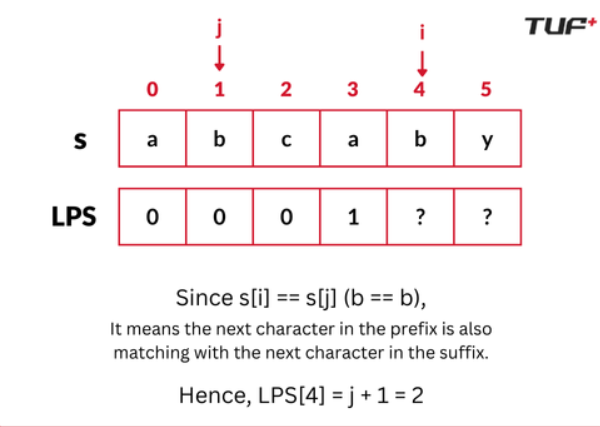

Assume that we have already computed the LPS array for the indices 0 to 4. Now, we are at index 5 (i == 5) and we want to find LPS[5].

### Understanding

```
* i and j represents that the prefix of string s (s[0...j-1]) matches with the suffix of the string s[0...i-1]. (Since "a" matches as prefix as well as suffix in "abca", thus j = 1, which is length of "a").

* Now if we found s[i] and s[j] to be equal, this means the next character in the prefix (s[j]) is also matching with the next character in the suffix (s[i]).

* Hence, we increase both j and i, indicating that the prefix-suffix match is now longer by one character. Thus, setting LPS[i] = j+1.

Thus, If s[i] == s[j], it means that we have successfully extended an existing prefix-suffix match.
```

**Scenario 2: When s[i] != s[j]:**

If s[i] ≠ s[j], we need to backtrack j without resetting it to 0 immediately. Instead, we use LPS[j-1] to find the next possible matching prefix.

**Why backtrack to LPS[j-1]?**

```
The value LPS[j-1] tells us the longest proper prefix that is also a suffix of the prefix ending at index j-1. If s[i] does not match s[j], then instead of rechecking from j = 0, we can check from LPS[j-1].
```

Consider the following example:

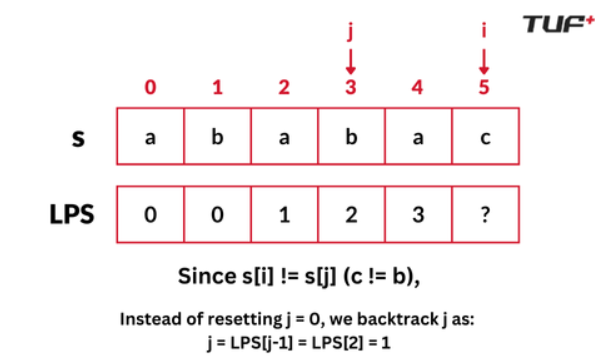

Assume that we have already computed the LPS array for the indices 0 to 4. Now, we are at index 5 (i == 5) and we want to find LPS[5].


### Understanding

```
Here, LPS[2] = 1 means that the longest prefix which is also a suffix till index 2 is "a" (having length 1).
So we check if the next best prefix match can be extended from j = 1 instead of restarting j from 0.

Thus, if s[i] != s[j], it means that we must backtrack j to LPS[j-1] to find the next possible matching prefix. This leverages the previously computed LPS values to avoid redundant comparisons.
```

### Approach

**Combine Pattern and Text using a delimiter forming a combined string. Compute the LPS array for the combined string. To compute the LPS array:**

```
* Initialize the LPS array with the first value as 0 and a pointer (j) to track the length of the longest prefix suffix.
* Traverse the string and compare the current character with the character at the tracked position.
* If they match, extend the prefix-suffix length by updating the LPS value and moving both pointers forward.
* If they do not match and the tracked position is greater than 0, backtrack using the previously computed LPS value.
* If no match is found after backtracking, set the LPS value to 0 and move to the next character.
```

**Iterate through the portion of the combined string corresponding to the text. If the LPS value equals the length of the pattern, it signifies a match at the corresponding position in the text.**

**Store the indices where the pattern matches and return the result.**

## Optimal Python Solution

In [13]:
class Solution:
    # Compute the Longest prefix suffix array for the combined string
    def computeLPS(self, s):
        n = len(s)  # size of string

        # To store the longest prefix suffix
        LPS = [0] * n

        i, j = 1, 0

        # Iterate on the string
        while i < n:
            # If the character matches
            if s[i] == s[j]:
                LPS[i] = j + 1
                i += 1
                j += 1
            
            # Otherwise
            else:
                # Trace back j pointer till it does not match
                while j > 0 and s[i] != s[j]:
                    j = LPS[j - 1]
                
                # If a match is found
                if s[i] == s[j]:
                    LPS[i] = j + 1
                    j += 1
                
                i += 1
        
        return LPS  # Return the computed LPS array

    # Function to find all indices of pattern in text
    def search(self, pattern, text):
        s = pattern + '$' + text  # Combined string

        # Function call to find the LPS array for the combined string
        LPS = self.computeLPS(s)

        # Length of pattern and text
        n, m = len(text), len(pattern)

        # To store the result
        ans = []

        # Iterate on the combined string after the delimiter
        for i in range(m + 1, len(s)):
            if LPS[i] == m:
                ans.append(i - 2 * m)

        return ans

In [14]:
if __name__ == "__main__":
    text = "xyzabxyzabxyz"
    pattern = "xyz"

    # Creating an instance of the solution class
    sol = Solution()

    # Function call to find all indices of pattern in text
    ans = sol.search(pattern, text)

    print(*ans)

0 5 10


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the length of the combined string. 
Computing the LPS array takes O(N) time:

Inside the loop:
If s[i] == s[j], both i and j are incremented → Constant time operation.
If s[i] != s[j], j is backtracked using LPS[j-1] inside a while loop.

Note that the total number of backtracking steps (decrementing j via LPS[j-1]) across all iterations is at most n because:
Each decrement follows a previous increment of j, meaning j moves forward and backward at most n times.

This ensures that the while loop runs in amortized O(1) time per character.

Finding the matches requires iterating on the LPS taking O(N) time. Thus, the overall time complexity is O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(N), to store the LPS array.
```

# 8. Shortest Palindrome :

## Problem Statement :

Given a string s convert it into a palindrome by adding characters to the beginning of it. Return the shortest palindrome you can create by performing this transformation.

### Examples :

**Example 1:**
```
Input: s = "aacecaaa"
Output: aaacecaaa

Explanation: Adding "a" to the front of "aacecaaa" makes it a palindrome: "aaacecaaa".
```

**Example 2:**
```
Input: s = "race"
Output: ecarace

Explanation: By adding "eca" in front of "race", the shortest palindrome "ecarace" is formed.
```

```
Constraints:
1 <= s.length <= 10^4
```


### Intuition

The problem involves converting a given string into a palindrome by adding characters to the beginning of the string. The goal is to determine the minimum number of characters that need to be added to achieve this.

The solution leverages the <b>Longest Prefix Suffix (LPS) array</b>, which captures the length of the longest prefix of a string that is also a suffix. By combining the string and its reverse with a delimiter, the LPS array helps identify the largest palindromic prefix in the string. This ensures the minimum number of characters are added to the front to complete the palindrome.

The reverse of the string plays a critical role, as it determines the characters that are missing to form a palindrome when compared to the original string.

### Approach

* Create the reverse of the input string to assist in determining the missing characters required for a palindrome.
* Concatenate the original string, a delimiter ($), and its reverse to form a new string.
* Use the combined string to compute the LPS array. This array determines the largest prefix of the original string that matches a suffix of its reverse.
* The difference between the size of the original string and the LPS value at the last position of the combined string gives the number of characters to add to the front of the string.
* Extract the required characters from the reverse of the string and prepend them to the original string to form the shortest palindrome.
* Return the modified string as the shortest palindrome.

## Optimal Python Solution

In [15]:
class Solution:
    # Compute the Longest prefix suffix array for the combined string
    def computeLPS(self, s):
        n = len(s)  # size of string

        # To store the longest prefix suffix
        LPS = [0] * n

        i, j = 1, 0

        # Iterate on the string
        while i < n:
            # If the character matches
            if s[i] == s[j]:
                LPS[i] = j + 1
                i += 1
                j += 1
            
            # Otherwise
            else:
                # Trace back j pointer till it does not match
                while j > 0 and s[i] != s[j]:
                    j = LPS[j - 1]
                
                # If a match is found
                if s[i] == s[j]:
                    LPS[i] = j + 1
                    j += 1
                
                i += 1
        
        return LPS  # Return the computed LPS array
    
    # Function to find the shortest palindrome by inserting
    # characters at the beginning of given string
    def shortestPalindrome(self, s):
        
        # To store the reverse string
        revs = s[::-1]
        
        # Forming the combined string
        str_combined = s + '$' + revs
        
        # Computing the LPS array
        lps = self.computeLPS(str_combined)
        
        # Calculating the answer
        ans = len(s) - lps[-1]
        
        # Finding the smallest string to be added in front of the given string
        to_add = revs[:ans]
        
        # Return the result
        return to_add + s

In [16]:
if __name__ == "__main__":
    s = "aacecaaa"
    
    # Creating an instance of the solution class
    sol = Solution()
    
    # Function call to find all indices of pattern in text
    ans = sol.shortestPalindrome(s)
    
    print(ans)

aaacecaaa


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), as all operations are linear with respect to the input string.
```

**Space Complexity:**
```
The Space Complexity will be O(N), to store the reverse string, the combined string, and the LPS array.
```

# 9. Longest Happy Prefix :

## Problem Statement :

Given a string s, return the longest happy prefix of s. <b>A happy prefix is a string that is both a proper prefix and a proper suffix.</b>
If no such prefix exists, return an empty string "".

### Examples :

**Example 1:**
```
Input: s = "ababab"
Output: "abab"

Explanation: "abab" is the longest prefix which is also suffix. They can overlap in the original string.
```

**Example 2:**
```
Input: s = "aaaa"
Output: "aaa"

Explanation: "aaa" is the longest prefix which is also a suffix in the string "aaaa".
```

**Example 3:**
```
Input: s = "abc"
Output: ""
```

```
Constraints:
1 <= s.length <= 10^4
```

### Intuition

The goal is to find the longest prefix of the string s that is also a proper suffix. This means:

```
* The prefix and suffix must match character by character.
* It must be proper, so it cannot be the entire string itself.
```

This is a classic case of pattern overlap, and it matches perfectly with the idea of the <b>LPS (Longest Prefix Suffix) array</b> used in the KMP (Knuth-Morris-Pratt) string matching algorithm.

### Approach

* Compute the Longest Prefix Suffix (LPS) array using the KMP preprocessing technique.
* The LPS array stores the length of the longest proper prefix which is also a suffix for each prefix of the string.
* The final value in the LPS array indicates the length of the longest happy prefix.
* Extract the substring from the start of the string up to this length and return it.
* If the length is zero, return an empty string.

## Optimal Python Solution

In [17]:
class Solution:
    # Compute the Longest prefix suffix array for the combined string
    def computeLPS(self, s):
        n = len(s)  # size of string

        # To store the longest prefix suffix
        LPS = [0] * n

        i, j = 1, 0

        # Iterate on the string
        while i < n:
            # If the character matches
            if s[i] == s[j]:
                LPS[i] = j + 1
                i += 1
                j += 1

            # Otherwise
            else:
                # Trace back j pointer till it does not match
                while j > 0 and s[i] != s[j]:
                    j = LPS[j - 1]

                # If a match is found
                if s[i] == s[j]:
                    LPS[i] = j + 1
                    j += 1
                i += 1

        return LPS  # Return the computed LPS array

    '''
    Function to find the longest happy
    prefix of the given string
    '''
    def lps(self, s):
        LPS = self.computeLPS(s)
        return s[:LPS[-1]]

In [18]:
if __name__ == "__main__":
    s = "ababab"

    # Creating an instance of the solution class
    sol = Solution()

    '''
    Function call to find the longest
    happy prefix of the given string
    '''
    ans = sol.lps(s)

    print("The longest happy prefix of the given string is:", ans)

The longest happy prefix of the given string is: abab


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N), where N is the length of given string.
Building the LPS array takes O(N) time. Extracting the substring also takes O(k) time, where k is the length of the longest happy prefix (and k ≤ n), and hence it's O(N) in the worst case. Thus, the overall time complexity is O(N) + O(N) which is O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(N), because an additional array LPS of size n is used to store the prefix-suffix lengths.
```

# 10. Count Palindromic Subsequences :

## Problem Statement :

You are given a string s consisting of lowercase English letters.

Return the total number of palindromic subsequences present in the string.

**A subsequence is a sequence that can be derived from another string by deleting some or no characters without changing the order of the remaining characters.**

A palindromic subsequence is one that reads the same forward and backward.

### Examples :

**Example 1:**
```
Input: s = "abcd"
Output: 4

Explanation: Only the single characters are palindromic: "a", "b", "c", "d".
```

**Example 2:**
```
Input: s = "aab"
Output: 4

Explanation: The palindromic subsequences are: "a", "a", "b", and "aa".
```

```
Constraints:
1 <= s.length <= 30
All characters in s are lowercase English letters.
The answer can be large, but you do not need to take modulo.
Subsequences need not be distinct — count all valid palindromic subsequences.
```

## Brute Force Solution

### Intuition

To count how many palindromic subsequences exist in a string, we need to consider all subsequences formed by picking or skipping characters, but only count those that read the same forwards and backwards. Instead of trying to generate all subsequences (which would be 2ⁿ and impossible to handle for large strings), we use Dynamic Programming by expanding substrings from left to right. If the characters at both ends of a substring are equal, they contribute to new palindromes formed by wrapping smaller subsequences inside them. If they are different, we add results from both halves but avoid counting duplicates twice. This way, we build up the result efficiently without explicitly generating any subsequences.

### Approach

* Define a recursive function solve(i, j) that returns the number of palindromic subsequences in the substring s[i...j].
* If i > j, return 0 because it's an invalid range. If i == j, return 1 because a single character is always a palindrome.
* Use a 2D memo table dp[i][j] to store precomputed results and avoid redundant calculations.



**If s[i] == s[j], then:**
```
* All palindromes inside s[i+1...j-1] can be extended by wrapping s[i] and s[j].
* So, solve(i,j) = 1 + solve(i+1,j) + solve(i,j-1).
```

**If s[i] != s[j], then:**
```
* Palindromes counted from excluding either end are combined.
* But palindromes inside s[i+1...j-1] would be counted twice, so subtract them once.
* Thus, solve(i,j) = solve(i+1,j) + solve(i,j-1) - solve(i+1,j-1).
```

**Store each computed answer in dp[i][j] before returning it to ensure memoization.**

**Final answer is solve(0, n-1), where n is the length of the string.**

## Dry Run

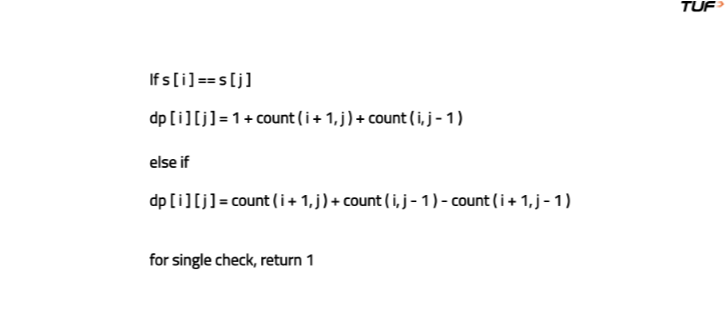
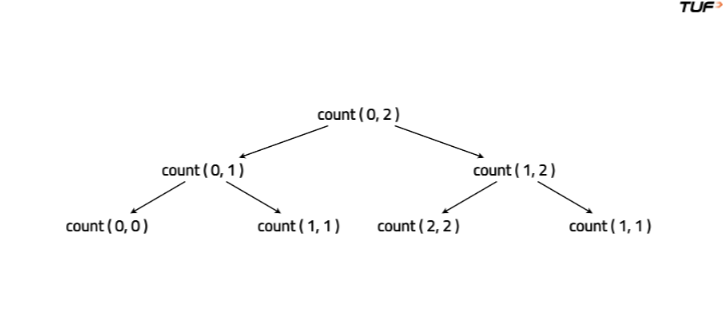
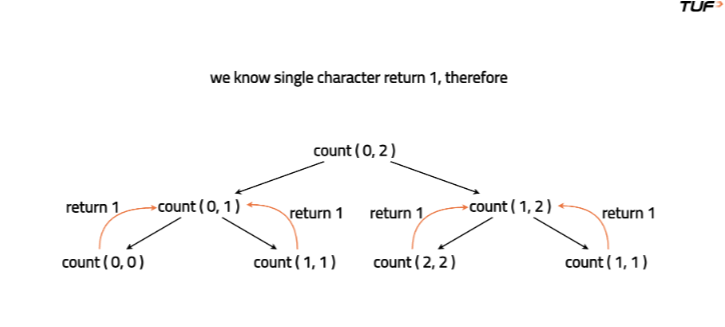
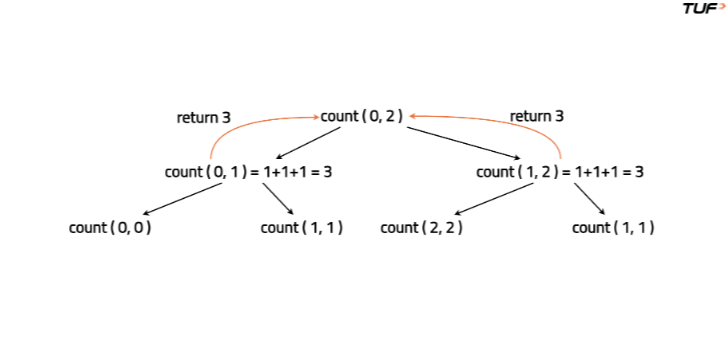
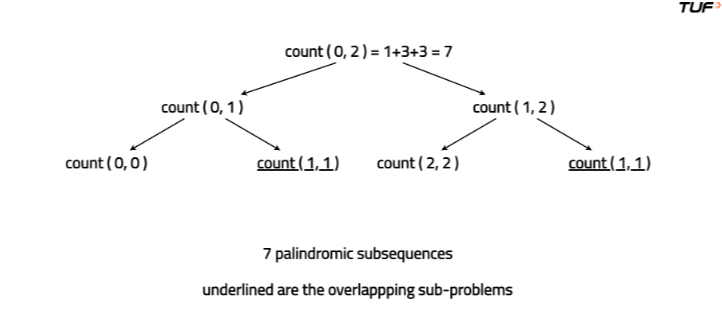

## Brute Force Python Solution

In [19]:
# Solution class to count palindromic subsequences
class Solution:
    
    # Function to count palindromic subsequences using memoization
    def countPalSubseq(self, s: str) -> int:
        # Get the length of the string
        n = len(s)
        # Initialize DP table with -1
        dp = [[-1]*n for _ in range(n)]

        # Recursive helper function
        def helper(i, j):
            # Base case: single character
            if i == j: 
                return 1
            # Base case: invalid substring
            if i > j: 
                return 0
            # Return cached result if already computed
            if dp[i][j] != -1: 
                return dp[i][j]

            # If characters match, sum cases
            if s[i] == s[j]:
                dp[i][j] = 1 + helper(i+1, j) + helper(i, j-1)
            else:
                # If characters differ, subtract overlapping case
                dp[i][j] = helper(i+1, j) + helper(i, j-1) - helper(i+1, j-1)
            # Return computed value
            return dp[i][j]

        # Start recursion for entire string
        return helper(0, n-1)

In [20]:
# Create solution object
sol = Solution()  
# Hardcoded input string
s = "aaa"
# Print total palindromic subsequences
print(sol.countPalSubseq(s))

7


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($n^2$), where n is the length of the string. We compute each subproblem (i, j) once and reuse the results due to memoization.

**Space Complexity:**

The Space Complexity will be O($n^2$) + O($n$) used by the DP table to store results for all subproblems, plus O(n) recursion stack in the worst case.

## Optimal Solution

### Intuition

The idea is to build a DP table iteratively instead of using recursion. We consider all substrings of the given string in increasing order of length. For each substring s[i...j], we count the number of palindromic subsequences by combining the counts of smaller substrings. If the characters at the ends (s[i] and s[j]) are the same, we can include new palindromes formed by these characters along with subsequences inside. Otherwise, we sum the counts from the left and right substrings and subtract the overlapping subsequences to avoid double counting.

### Approach

* Initialize a 2D DP table dp[n][n] where n is the length of the string.
* Set dp[i][i] = 1 for all i, since single characters are palindromes.
* Iterate over substring lengths from 2 to n.

* For each substring s[i...j]:

```
If s[i] == s[j], dp[i][j] = dp[i+1][j] + dp[i][j-1] + 1.
Else, dp[i][j] = dp[i+1][j] + dp[i][j-1] - dp[i+1][j-1].
The final answer is dp[0][n-1], which represents the entire string.
```

* The final answer is dp[0][n-1], which represents the entire string.

## Dry Run

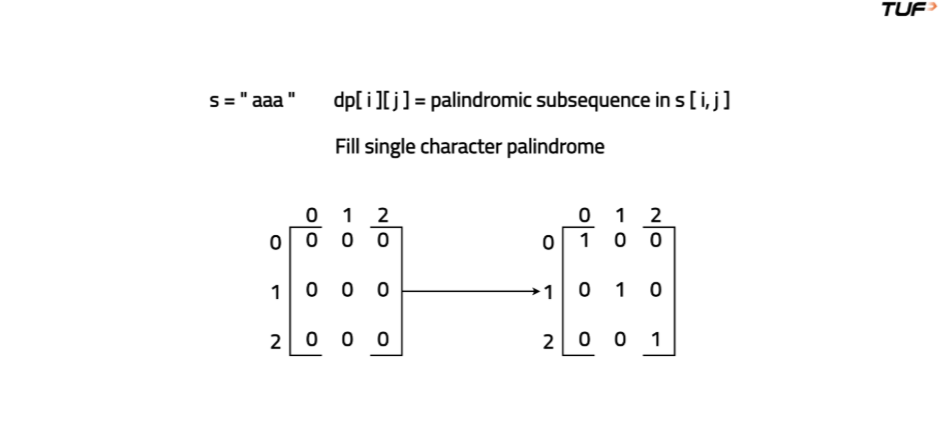
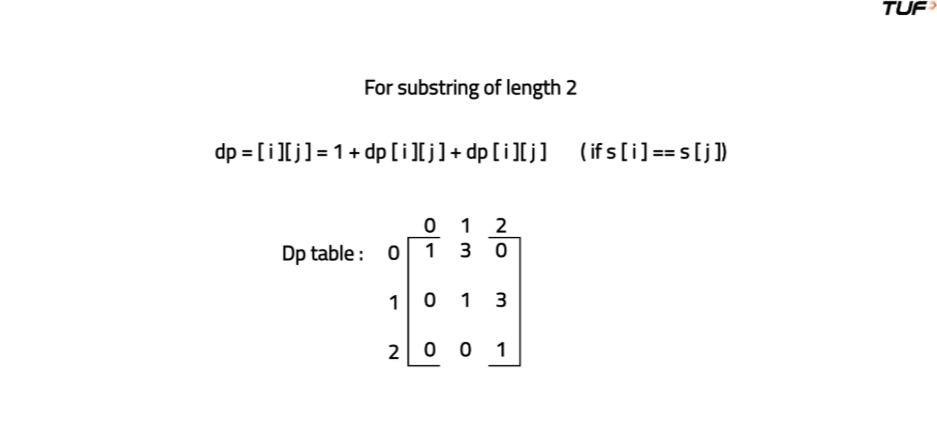
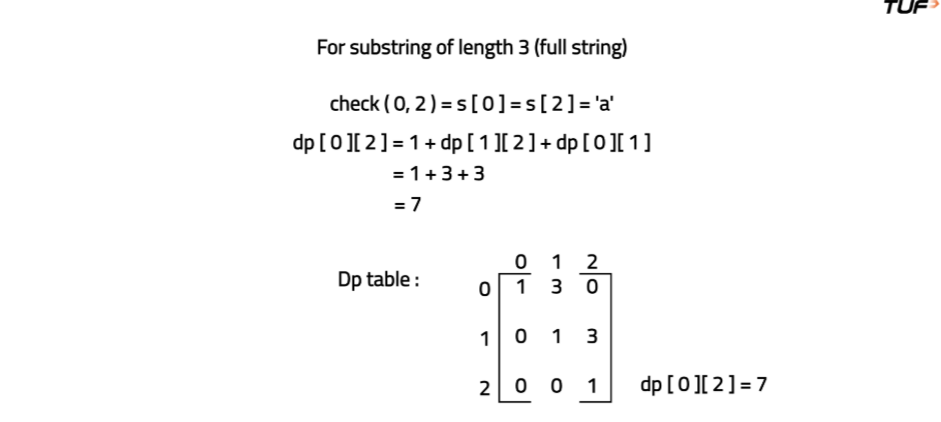

## Optimal Python Solution

In [21]:
# Solution class to count palindromic subsequences using tabulation
class Solution:
    # Function to count palindromic subsequences in string s
    def countPalSubseq(self, s: str) -> int:
        n = len(s)

        # Create a DP table where dp[i][j] stores the count of
        # palindromic subsequences in substring s[i..j]
        dp = [[0] * n for _ in range(n)]

        # Fill the DP table for substrings of length 1
        # Every single character is a palindrome of length 1
        for i in range(n):
            dp[i][i] = 1

        # Consider all substring lengths starting from 2 to n
        for length in range(2, n + 1):
            # Iterate over all possible starting indices i
            for i in range(n - length + 1):
                j = i + length - 1  

                # If characters at start and end match
                if s[i] == s[j]:
                    # Count palindromes by including both characters,
                    # plus palindromes in s[i+1..j] and s[i..j-1]
                    dp[i][j] = 1 + dp[i + 1][j] + dp[i][j - 1]
                else:
                    # If characters differ, subtract overlapping palindromes
                    # counted twice in dp[i+1][j] and dp[i][j-1]
                    dp[i][j] = dp[i + 1][j] + dp[i][j - 1] - dp[i + 1][j - 1]

        # The answer for the whole string is stored in dp[0][n-1]
        return dp[0][n - 1]

In [22]:
# Driver code
if __name__ == "__main__":
    sol = Solution()
    s = "aaa"

    # Output the count of palindromic subsequences
    print(sol.countPalSubseq(s))

7


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be  O($n^2$), where n is the length of the string. We fill each subproblem dp[i][j] once in the tabulation table.

**Space Complexity:**

The Space Complexity will be O($n^2$) used by the DP table to store results for all subproblems.